# ADIA Training
# Module: Unsupervised Learning
# Clustering, Segmentation, Visualization, Dimensional Reduction

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/baskiotisn/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


<div class = "alert alert-block alert-warning">
The file <code>customers.csv</code> contains a list of customers with the total spend by item. The objective of this lab is to do a clustering on the customers and experimenting with dimensional reduction and visualization.

</div>

# 1 EDA (exploratory data analysis)

<div class = "alert alert-block alert-info">
Open the file and load the data.
Draw :
    <br>* the violin plot/bloxplot of each feature and the barplot
    <br>* the scatter plot of the pairwise features
    <br>* the correlation matrix 
</div>

In [2]:
data = pd.read_csv("customers.csv")

<Axes: >

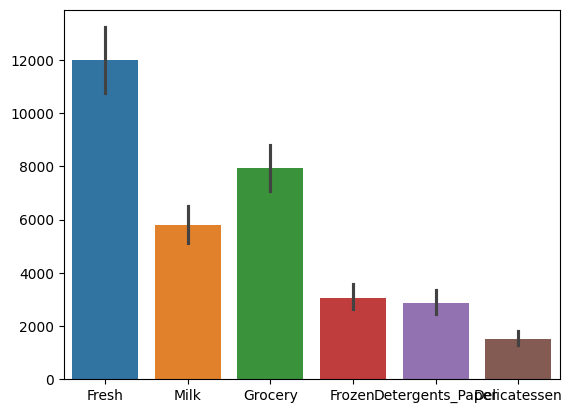

In [3]:
data.head(10)
sns.barplot(data=data)

<Axes: >

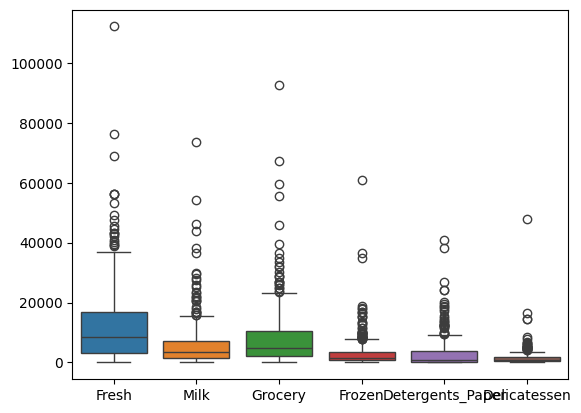

In [4]:
sns.boxplot(data)

<Axes: xlabel='Fresh'>

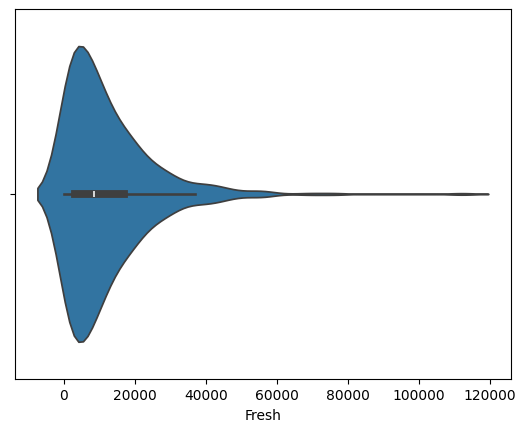

In [19]:
sns.violinplot(data,x='Fresh')

<Axes: >

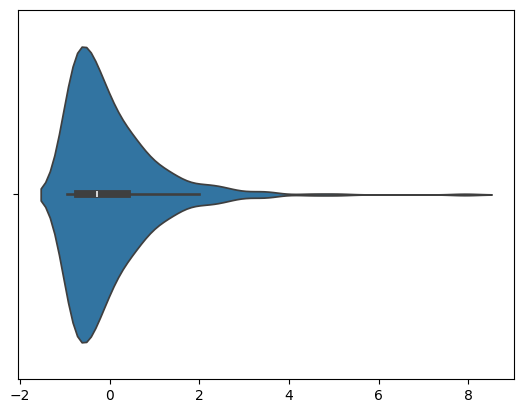

In [20]:
from sklearn.preprocessing import StandardScaler
fresh_std = StandardScaler().fit_transform(data.Fresh.values.reshape(-1,1))
sns.violinplot(x=fresh_std.reshape(-1))

<Axes: >

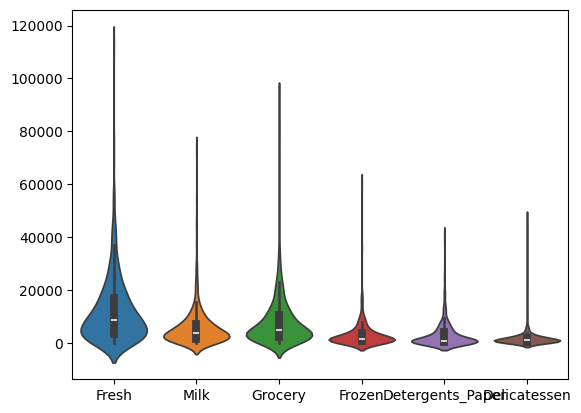

In [5]:
sns.violinplot(data)

<Axes: ylabel='Density'>

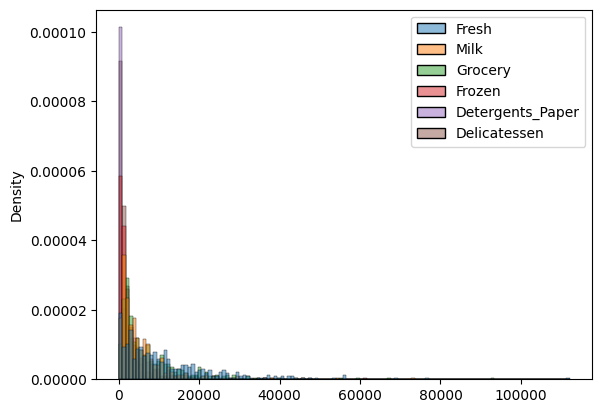

In [10]:
sns.histplot(data,stat='density')

<Axes: ylabel='Density'>

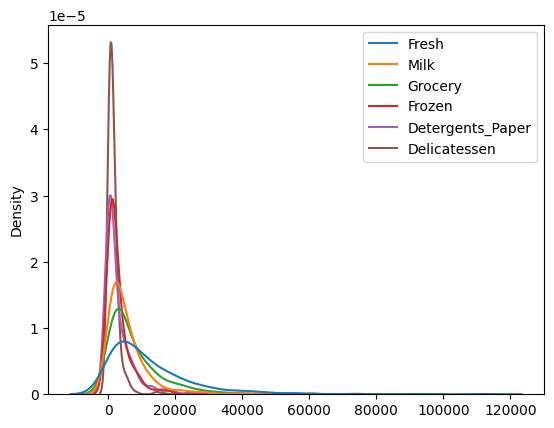

In [6]:
sns.kdeplot(data)

<Axes: xlabel='Frozen', ylabel='Density'>

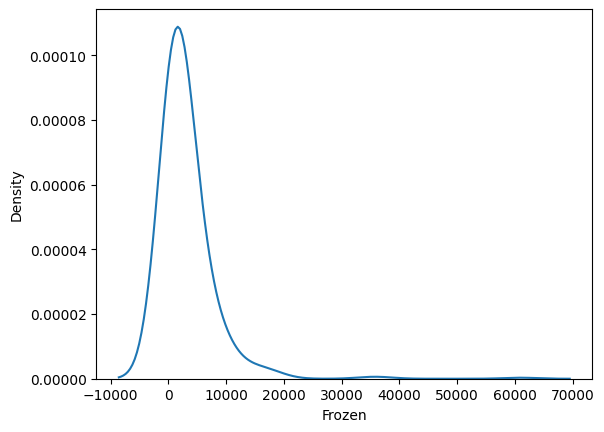

In [24]:
sns.kdeplot(data,x='Frozen',bw_adjust=2)

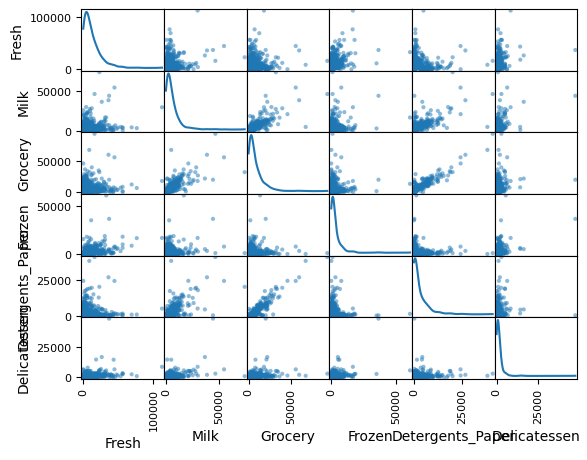

In [29]:
_=pd.plotting.scatter_matrix(data,diagonal='kde')

<Axes: >

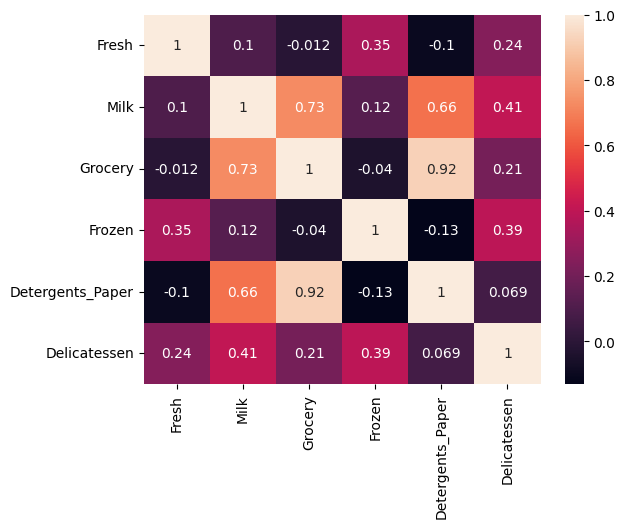

In [30]:
sns.heatmap(data.corr(),annot=True)

<div class = "alert alert-block alert-info">
What can you deduce from those graphs ? What transformation is required ?
    </br>
    Apply it and redraw the graphs.
</div>

In [31]:
log_data = np.log(data)

<Axes: >

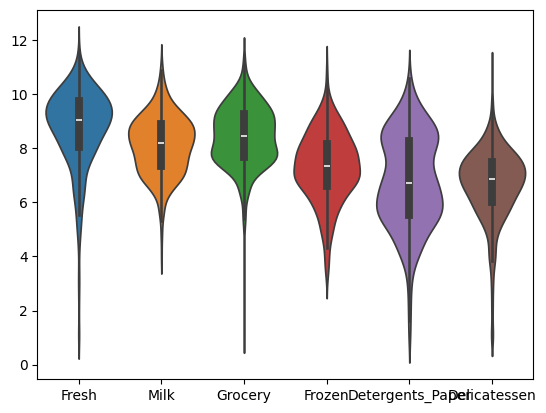

In [32]:
sns.violinplot(log_data)

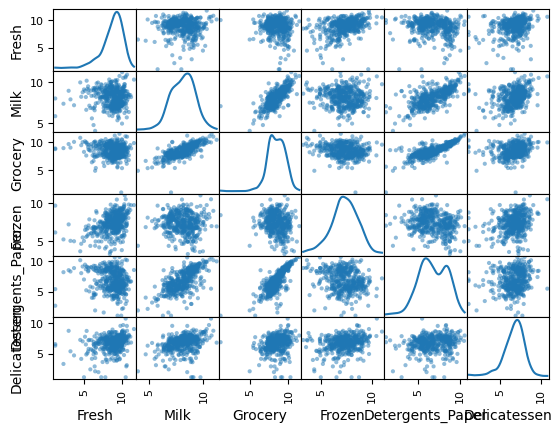

In [33]:
_=pd.plotting.scatter_matrix(log_data,diagonal='kde')

<Axes: >

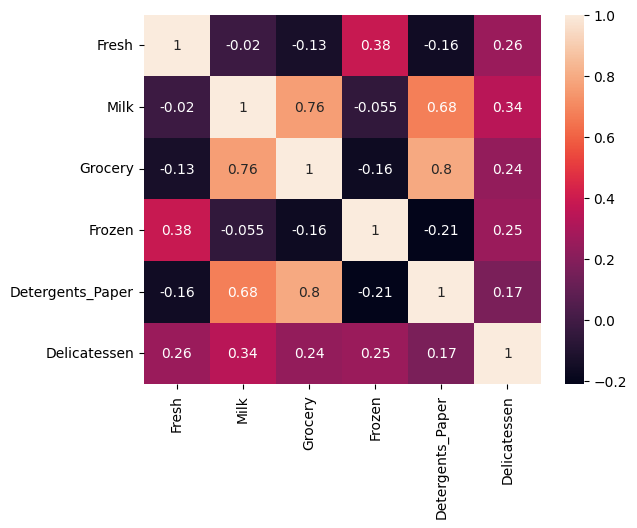

In [34]:
sns.heatmap(log_data.corr(),annot=True)

# 2 - Dimensional reduction

<div class = "alert alert-block alert-info">
The correlation matrix shows that some features are correlated. Here we will use a PCA to reduce the dimensionality.
    <br>
 Compute the PCA  (what is mandatory to do before computing the PCA ?)
   
   
</div>

In [37]:
data = pd.read_csv("customers.csv")
log_data = np.log(data)
log_data = StandardScaler().fit_transform(log_data)

In [38]:
from sklearn.decomposition import PCA


In [42]:
pca = PCA(n_components=4)
pca.fit(log_data)

PCA(n_components=4)

<div class = "alert alert-block alert-info">
 Display the explained variance for each axis
    </div>

[0.43990911 0.27127662 0.10756755 0.10144726]


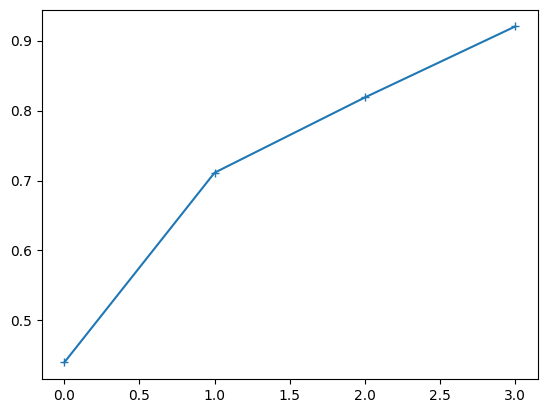

In [43]:
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_),"+-")

[[ 0.10462664 -0.54227414 -0.57169402  0.13835053 -0.5513378  -0.21223507]
 [-0.59047385 -0.13314537  0.00628236 -0.58953493  0.06862424 -0.53038924]
 [ 0.63189359  0.07607607  0.13344981  0.03363014  0.19725842 -0.7328521 ]
 [-0.48852525  0.06138591  0.09567158  0.7916089   0.07734734 -0.34028597]]


<Axes: >

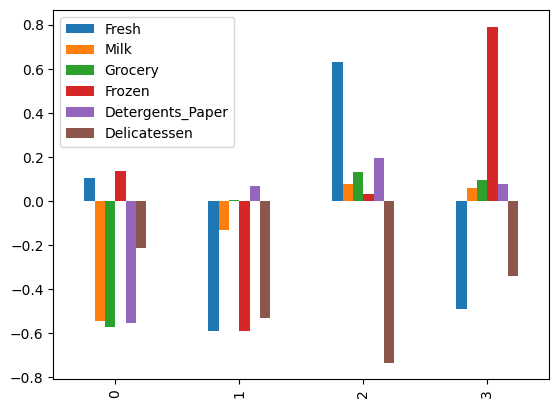

In [48]:
print(pca.components_)
pca_coords = pd.DataFrame(pca.components_,columns=data.columns)
pca_coords.plot.bar()

<div class = "alert alert-block alert-info">
Draw with a plotbar the coordinates of the new dimensions with respect to the old ones. 
    </div>

<div class = "alert alert-block alert-info">
Look at the contribution of each sample to each new axis. Draw the histogram.
</div>

In [50]:
pca_data = pca.transform(log_data)
print(pca_data)

[[-1.37937462  0.30383791  0.21638512 -1.41786264]
 [-1.43480713 -0.53814669 -0.08377373  0.03305806]
 [-1.50395108 -1.22615334 -0.97824147 -0.14830833]
 ...
 [-2.84439229 -0.19594314  0.50310253 -0.88635579]
 [ 1.00960255 -0.44811099 -0.66519719 -0.81436695]
 [ 0.90233041  2.910913    0.90350616 -1.07959232]]


cos2 of first 10 points [[4.69547005e-01 2.27823512e-02 1.15549857e-02 4.96115658e-01]
 [8.73656966e-01 1.22900950e-01 2.97830793e-03 4.63776241e-04]
 [4.76757776e-01 3.16898319e-01 2.01707714e-01 4.63619230e-03]
 [2.93769673e-01 6.28842800e-01 2.59284877e-02 5.14590397e-02]
 [1.64300710e-01 7.97694521e-01 2.50775809e-02 1.29271876e-02]
 [6.06543401e-01 1.32401647e-02 6.71979579e-04 3.79544455e-01]
 [2.38072111e-01 1.35181656e-01 2.76636491e-01 3.50109742e-01]
 [7.29237761e-01 2.03631947e-01 5.30729422e-02 1.40573505e-02]
 [2.44658831e-01 3.38518426e-01 7.47357083e-03 4.09349172e-01]
 [9.74458325e-01 2.18209513e-02 1.10192445e-03 2.61879896e-03]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

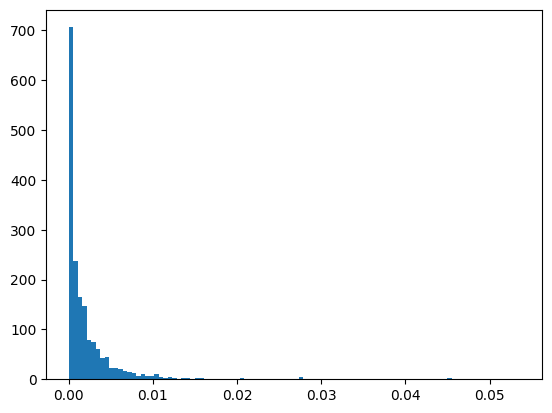

In [52]:
## Sample analysis
# Computing the real eigen value
eigval = ((data.shape[0]-1)/data.shape[0])*pca.explained_variance_
#Contribution of each sample to the inertia
ctr_i = np.sum(pca_data**2,axis=1)
#Quality of each sample (cos2)
cos2 = pca_data**2/ctr_i.reshape(-1,1)
print("cos2 of first 10 points", cos2[:10])
#Sum to  1 over all axis 
print(cos2.sum(1))
#Contribution of sample to each axis (sum to 1)
ctr_ind = pca_data**2/(data.shape[0]*eigval.reshape(1,-1))
print(ctr_ind)
print(ctr_ind.sum(0))
_=plt.hist(ctr_ind.reshape(-1),bins=100)

<div class = "alert alert-block alert-info">
Look at the contribution of each dimension to each new axis
    </div>

In [53]:
sqrt_eigval = np.sqrt(eigval)
# Variable Correlation
corvar =  pca.components_.T*sqrt_eigval.reshape(1,-1)
# Quality of each axis
cos2_var = corvar**2
print(cos2_var.sum(axis=1))
# Contribution of each old axis to the new axes
ctr_var = cos2_var/eigval.reshape(1,-1)
ctr_var.sum(1)
ctr_var

[0.99936233 0.81104496 0.87979313 0.99837515 0.83874386 0.99388378]


array([[1.09467332e-02, 3.48659370e-01, 3.99289508e-01, 2.38656918e-01],
       [2.94061248e-01, 1.77276903e-02, 5.78756808e-03, 3.76823051e-03],
       [3.26834052e-01, 3.94680902e-05, 1.78088511e-02, 9.15305036e-03],
       [1.91408689e-02, 3.47551438e-01, 1.13098616e-03, 6.26644647e-01],
       [3.03973374e-01, 4.70928597e-03, 3.89108834e-02, 5.98261045e-03],
       [4.50437240e-02, 2.81312747e-01, 5.37072204e-01, 1.15794543e-01]])

<div class = "alert alert-block alert-info">
Draw the first two axes and the features in a biplot. 
    </br>
    What can you conclude from the biplot ?
    </div>

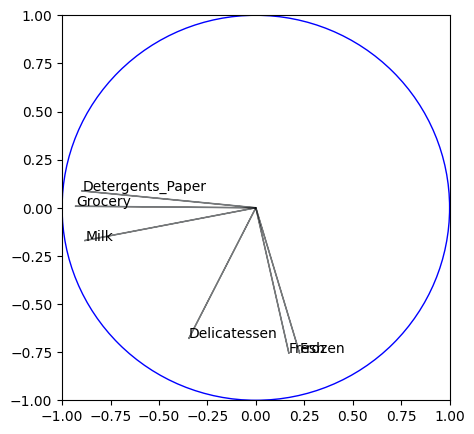

In [55]:
fig, axes = plt.subplots(figsize=(5,5))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
for j in range(data.shape[1]):
    plt.arrow(0,0,corvar.T[0,j],corvar.T[1,j],alpha=0.5)
    plt.annotate(data.columns.tolist()[j],(corvar.T[0,j],corvar.T[1,j]))
plt.show()

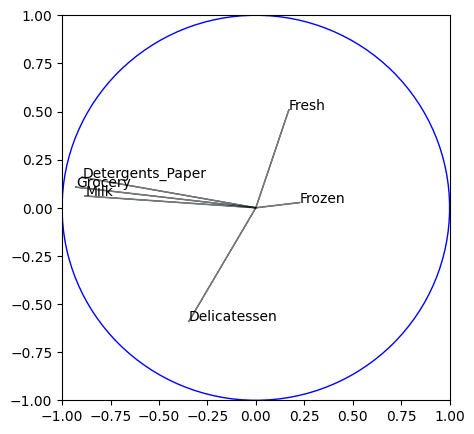

In [58]:
fig, axes = plt.subplots(figsize=(5,5))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
for j in range(data.shape[1]):
    plt.arrow(0,0,corvar.T[0,j],corvar.T[2,j],alpha=0.5)
    plt.annotate(data.columns.tolist()[j],(corvar.T[0,j],corvar.T[2,j]))
plt.show()

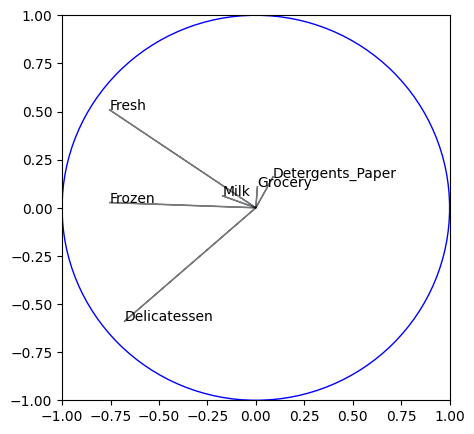

In [59]:
fig, axes = plt.subplots(figsize=(5,5))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
for j in range(data.shape[1]):
    plt.arrow(0,0,corvar.T[1,j],corvar.T[2,j],alpha=0.5)
    plt.annotate(data.columns.tolist()[j],(corvar.T[1,j],corvar.T[2,j]))
plt.show()

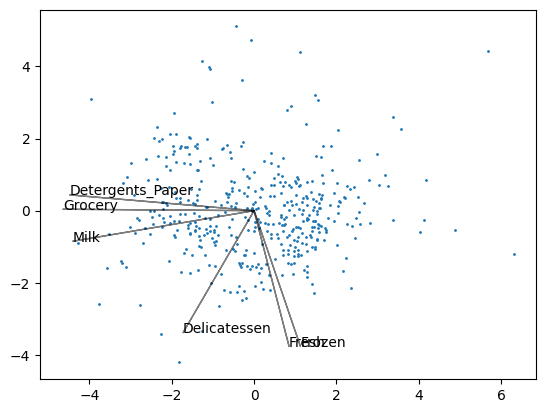

In [60]:
plt.scatter(pca_data[:,0],pca_data[:,1],s=1)
for i in range(pca.components_.shape[1]):
    plt.arrow(0,0,corvar.T[0,i]*5,corvar.T[1,i]*5,alpha=0.5)
    plt.text(corvar.T[0,i]*5,corvar.T[1,i]*5,data.columns[i])

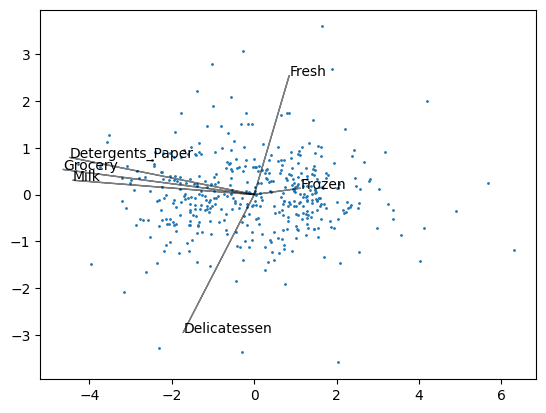

In [62]:
plt.scatter(pca_data[:,0],pca_data[:,2],s=1)
for i in range(pca.components_.shape[1]):
    plt.arrow(0,0,corvar.T[0,i]*5,corvar.T[2,i]*5,alpha=0.5)
    plt.text(corvar.T[0,i]*5,corvar.T[2,i]*5,data.columns[i])

# 3 - Clustering and Visualization

<div class = "alert alert-block alert-info">
    First, you will use k-means to cluster the data. Use the elbow method to determine the best k. 
    <br>
    For the selected k, display the centroids. To do this, you'll need to apply the inverse PCA transform to recover the original dimensions. Is there an interpretation of the various clusters?
    <br>
Display the points according to the first 2 axes of the PCA and color them according to the cluster to which they belong.

</div>


 Use the MDS, Isomap and t-SNE algorithms to display the data and the clusters. Compare the results.

<div class = "alert alert-block alert-info">
Use DBScan and agglomerative clustering to infer new clusters. Draw the scatter plot of the best result with a color by cluster.  Did one looks better than the other ?
    </div>
    